In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_star')

In [0]:
import pandas as pd
train = pd.read_csv('data/xy_train.csv')


In [3]:
print(train.shape)
train.head()

(38872, 35)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection
0,0,0,0,0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,9,6,53,45
1,1,1,1,1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,22,17,114,177
2,2,2,2,2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,19,23,206,86
3,3,3,3,3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,7,24,144,171
4,4,4,4,4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,14,13,118,64


In [0]:
train['delta_wm'] = train['p0_wm'] -train['p1_wm']

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38872 entries, 0 to 38871
Data columns (total 36 columns):
Unnamed: 0                 38872 non-null int64
Unnamed: 0.1               38872 non-null int64
Unnamed: 0.1.1             38872 non-null int64
game_id                    38872 non-null float64
P0_species                 38872 non-null float64
P0_Camera                  38872 non-null float64
P0_Selection               38872 non-null float64
P0_Ability                 38872 non-null float64
P0_Right Click             38872 non-null float64
P0_SetControlGroup         38872 non-null float64
P0_GetControlGroup         38872 non-null float64
P0_AddToControlGroup       38872 non-null float64
P0_ControlGroup            38872 non-null float64
P1_species                 38872 non-null float64
P1_Camera                  38872 non-null float64
P1_Selection               38872 non-null float64
P1_Ability                 38872 non-null float64
P1_Right Click             38872 non-null float

# EDA

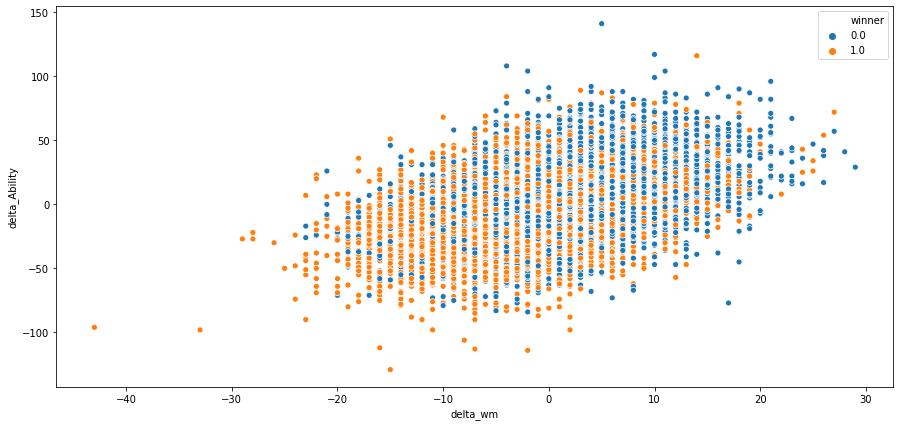

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_wm',y= 'delta_Ability',hue='winner')

In [0]:
train.loc[train['delta_wm']<0,'winner'].value_counts()

1.0    10153
0.0     7515
Name: winner, dtype: int64

- ability 컬럼과 일꾼 컬럼의 상관관계가 높아보임.

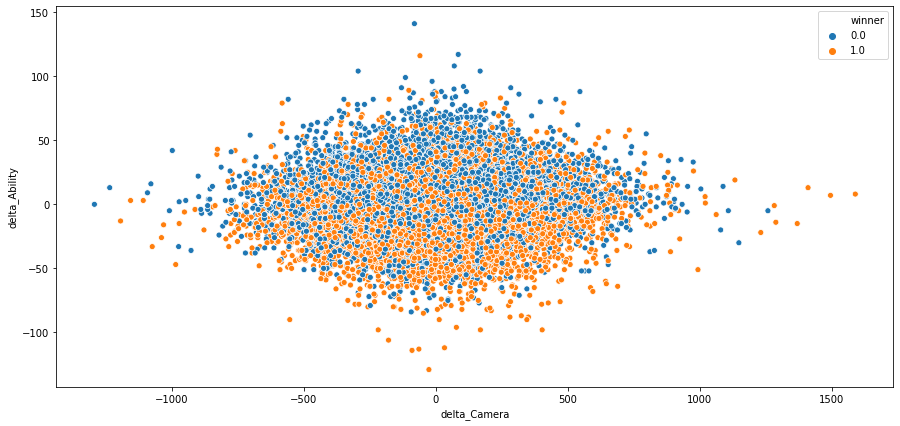

In [0]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_Camera',y= 'delta_Ability',hue='winner' )

In [0]:
train.loc[train['delta_Camera']>0,'winner'].value_counts()

1.0    9873
0.0    9667
Name: winner, dtype: int64

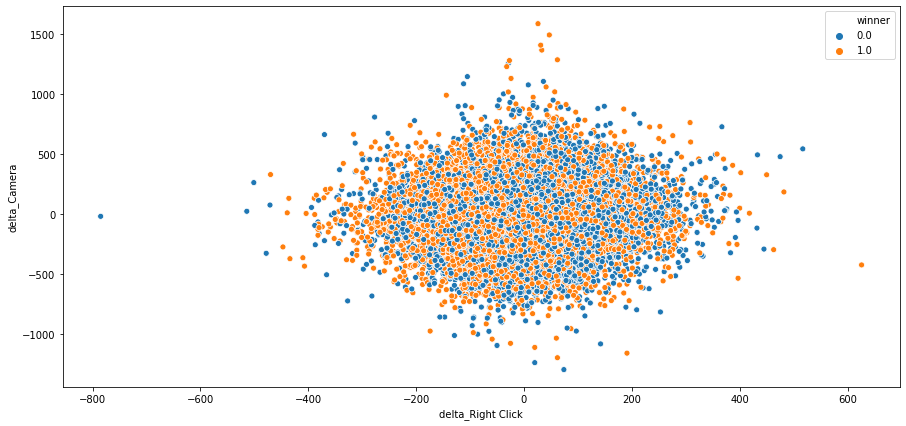

In [0]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_Right Click',y= 'delta_Camera',hue='winner' )

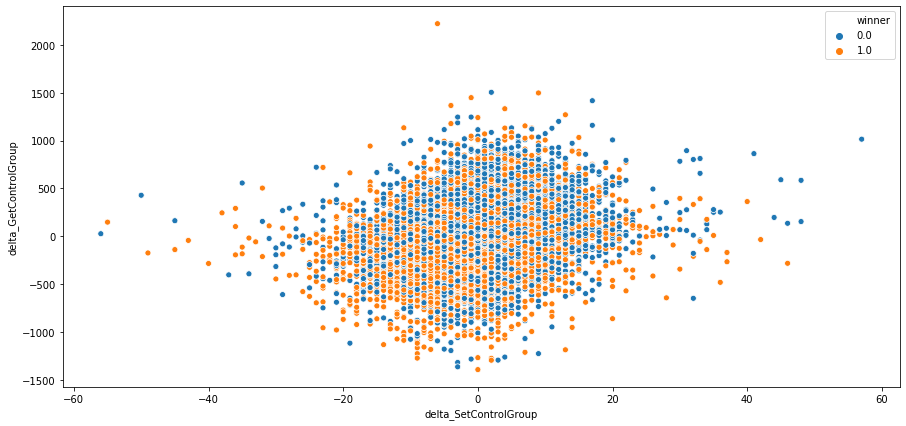

In [0]:
a= train[(train['delta_SetControlGroup'] <20) & (train['delta_SetControlGroup'] >-20) ]
plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_SetControlGroup',y= 'delta_GetControlGroup',hue='winner' )

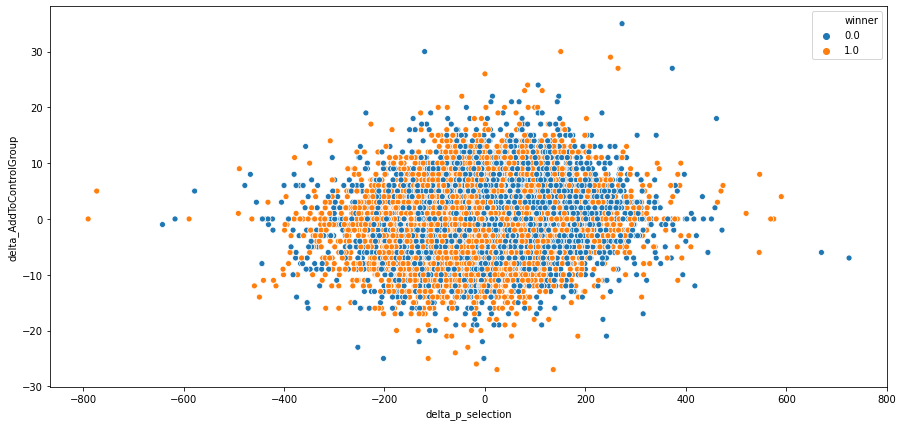

In [0]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_p_selection',y= 'delta_AddToControlGroup',hue='winner' )

In [0]:
train.loc[train['delta_p_selection']<0,'winner'].value_counts()

1.0    10266
0.0     8866
Name: winner, dtype: int64

In [0]:
train.loc[train['delta_AddToControlGroup']>0,'winner'].value_counts()

0.0    6812
1.0    6113
Name: winner, dtype: int64

In [0]:
train.loc[(train['delta_SetControlGroup']>0) & (train['delta_GetControlGroup']<0),'winner'].value_counts()

1.0    3096
0.0    2815
Name: winner, dtype: int64

In [0]:
train.loc[ (train['delta_GetControlGroup']<0),'winner'].value_counts()

1.0    10666
0.0     8145
Name: winner, dtype: int64

In [0]:
# 부대 불러오기 값 0 일때 플레이어 승리 수
train.loc[ (train['delta_GetControlGroup']==0),'winner'].value_counts()

1.0    662
0.0    653
Name: winner, dtype: int64


- 어빌리티가 높았을 때, 승리했을 경우가 많다  
- 셀렉션은 큰 영향을 끼치지 않는 것 같다.
- 카메라는 큰 영향을 끼치지 않는 것 같다.
- 부대 불러오기도 승리한 플레이어가 높은 값을 가진다.
- delta controlgroup은 대부분이 0값이다. 컬럼이 무의미할듯

---



In [0]:
train.loc[train['delta_Camera'] <0,'winner'].value_counts()

0.0    9657
1.0    9585
Name: winner, dtype: int64

- 종족간의 상성

T VS P

In [0]:
tp= (train['P0_species'] == 0) & (train['P1_species'] ==1) | (train['P0_species'] == 1) & (train['P1_species'] ==0)
t_tp = (test['P0_species'] == 0) & (test['P1_species'] ==1) | (test['P0_species'] == 1) & (test['P1_species'] ==0)

train[tp]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz,tp,tz,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,0,1,0,1,0,0,0,1,0
3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0
6.0,1.0,324.0,76.0,39.0,131.0,12.0,27.0,0.0,0.0,0.0,265.0,155.0,55.0,141.0,4.0,842.0,5.0,0.0,59.0,-79.0,-16.0,-10.0,8.0,-815.0,-5.0,0.0,1.0,0,1,0,1,0,0,0,1,0
10.0,1.0,477.0,189.0,79.0,218.0,4.0,52.0,0.0,0.0,0.0,551.0,104.0,84.0,156.0,1.0,566.0,3.0,0.0,-74.0,85.0,-5.0,62.0,3.0,-514.0,-3.0,0.0,0.0,0,1,0,1,0,0,0,1,0
16.0,0.0,855.0,85.0,42.0,159.0,0.0,8.0,6.0,0.0,1.0,523.0,91.0,64.0,409.0,1.0,138.0,10.0,0.0,332.0,-6.0,-22.0,-250.0,-1.0,-130.0,-4.0,0.0,0.0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38860.0,1.0,130.0,33.0,17.0,55.0,5.0,28.0,0.0,0.0,0.0,388.0,17.0,11.0,11.0,0.0,0.0,0.0,0.0,-258.0,16.0,6.0,44.0,5.0,28.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,0
38861.0,0.0,147.0,61.0,21.0,79.0,2.0,1.0,0.0,0.0,1.0,225.0,57.0,31.0,28.0,1.0,0.0,0.0,0.0,-78.0,4.0,-10.0,51.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0
38863.0,1.0,211.0,107.0,39.0,149.0,5.0,118.0,1.0,0.0,0.0,318.0,49.0,31.0,81.0,5.0,33.0,0.0,0.0,-107.0,58.0,8.0,68.0,0.0,85.0,1.0,0.0,0.0,0,1,0,1,0,0,0,1,0


In [0]:
tp_vc = train[tp].groupby(['P0_species','P1_species']).winner.value_counts()
tp_vc

P0_species  P1_species  winner
0.0         1.0         1.0       2178
                        0.0       2130
1.0         0.0         1.0       2205
                        0.0       2178
Name: winner, dtype: int64

In [0]:
# 테프전 테란 승률
4335/tp_vc.sum() 

0.4987918536416983

In [0]:
# 테프전 프로토스 승률
4356/tp_vc.sum() 

0.5012081463583017

T vs Z

In [0]:
tz= (train['P0_species']==0) & (train['P1_species']==2) | (train['P0_species']==2) & (train['P1_species']==0)
t_tz= (test['P0_species']==0) & (test['P1_species']==2) | (test['P0_species']==2) & (test['P1_species']==0)
train[tz]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz,tp,tz,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,0,0,1,0,0,1,1,0,0
8.0,0.0,327.0,63.0,45.0,35.0,0.0,13.0,4.0,0.0,2.0,236.0,177.0,52.0,39.0,1.0,15.0,3.0,0.0,91.0,-114.0,-7.0,-4.0,-1.0,-2.0,1.0,0.0,1.0,0,0,1,0,0,1,1,0,0
11.0,2.0,804.0,120.0,42.0,139.0,0.0,25.0,5.0,0.0,0.0,491.0,98.0,54.0,52.0,0.0,0.0,0.0,0.0,313.0,22.0,-12.0,87.0,0.0,25.0,5.0,0.0,1.0,0,0,1,1,0,0,0,0,1
12.0,0.0,419.0,78.0,37.0,73.0,14.0,5.0,0.0,0.0,2.0,198.0,132.0,39.0,79.0,2.0,82.0,1.0,0.0,221.0,-54.0,-2.0,-6.0,12.0,-77.0,-1.0,0.0,1.0,0,0,1,0,0,1,1,0,0
19.0,0.0,769.0,104.0,86.0,246.0,14.0,306.0,1.0,0.0,2.0,543.0,272.0,78.0,190.0,4.0,333.0,3.0,0.0,226.0,-168.0,8.0,56.0,10.0,-27.0,-2.0,0.0,1.0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38855.0,2.0,850.0,237.0,89.0,134.0,0.0,6.0,2.0,0.0,0.0,444.0,252.0,80.0,291.0,6.0,795.0,9.0,0.0,406.0,-15.0,9.0,-157.0,-6.0,-789.0,-7.0,0.0,0.0,0,0,1,1,0,0,0,0,1
38856.0,0.0,317.0,122.0,45.0,128.0,6.0,68.0,2.0,0.0,2.0,706.0,77.0,29.0,79.0,3.0,28.0,0.0,0.0,-389.0,45.0,16.0,49.0,3.0,40.0,2.0,0.0,1.0,0,0,1,0,0,1,1,0,0
38858.0,0.0,649.0,250.0,98.0,152.0,7.0,46.0,3.0,0.0,2.0,213.0,302.0,76.0,206.0,9.0,123.0,9.0,0.0,436.0,-52.0,22.0,-54.0,-2.0,-77.0,-6.0,0.0,1.0,0,0,1,0,0,1,1,0,0


In [0]:
tz_vc = train[tz].groupby(['P0_species','P1_species']).winner.value_counts()
tz_vc

P0_species  P1_species  winner
0.0         2.0         0.0       2583
                        1.0       2529
2.0         0.0         0.0       2692
                        1.0       2504
Name: winner, dtype: int64

In [0]:
# 테저전 테란 승률
(2583+2504)/tz_vc.sum()

0.493500194024059

In [0]:
# 테저전 저그 승률
(2529+2692)/tz_vc.sum()

0.506499805975941

T VS T


In [0]:
tt= (train['P0_species']==0) & (train['P1_species']==0)
train[tt]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0
15.0,0.0,81.0,64.0,23.0,39.0,8.0,156.0,2.0,0.0,0.0,338.0,44.0,20.0,98.0,4.0,20.0,0.0,0.0,-257.0,20.0,3.0,-59.0,4.0,136.0,2.0,0.0,0.0
29.0,0.0,252.0,231.0,66.0,200.0,3.0,492.0,0.0,0.0,0.0,252.0,127.0,73.0,242.0,17.0,82.0,3.0,0.0,0.0,104.0,-7.0,-42.0,-14.0,410.0,-3.0,0.0,0.0
39.0,0.0,261.0,57.0,15.0,129.0,4.0,190.0,0.0,0.0,0.0,238.0,46.0,25.0,76.0,6.0,89.0,0.0,0.0,23.0,11.0,-10.0,53.0,-2.0,101.0,0.0,0.0,0.0
42.0,0.0,760.0,68.0,52.0,53.0,6.0,37.0,0.0,0.0,0.0,524.0,62.0,30.0,33.0,0.0,0.0,0.0,0.0,236.0,6.0,22.0,20.0,6.0,37.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827.0,0.0,68.0,11.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,46.0,40.0,6.0,12.0,3.0,155.0,0.0,0.0,22.0,-29.0,0.0,-6.0,-3.0,-155.0,0.0,0.0,0.0
38842.0,0.0,154.0,18.0,25.0,41.0,3.0,24.0,0.0,0.0,0.0,109.0,135.0,25.0,159.0,3.0,202.0,0.0,0.0,45.0,-117.0,0.0,-118.0,0.0,-178.0,0.0,0.0,0.0
38845.0,0.0,145.0,185.0,23.0,110.0,5.0,143.0,0.0,0.0,0.0,173.0,32.0,21.0,94.0,3.0,4.0,0.0,0.0,-28.0,153.0,2.0,16.0,2.0,139.0,0.0,0.0,1.0


In [0]:
train.loc[tt,'winner'].value_counts()

1.0    2913
0.0    2754
Name: winner, dtype: int64

P VS Z

In [0]:
pz= (train['P0_species']==1) & (train['P1_species']==2) | (train['P0_species']==2) & (train['P1_species']==1)
t_pz= (test['P0_species']==1) & (test['P1_species']==2) | (test['P0_species']==2) & (test['P1_species']==1)
train[pz]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz,tp,tz,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,1,0,0,0,0,1,0,1,0
7.0,2.0,315.0,148.0,53.0,79.0,17.0,43.0,0.0,0.0,1.0,508.0,87.0,64.0,303.0,5.0,192.0,6.0,0.0,-193.0,61.0,-11.0,-224.0,12.0,-149.0,-6.0,0.0,0.0,1,0,0,0,1,0,0,0,1
9.0,1.0,171.0,139.0,18.0,108.0,2.0,111.0,3.0,0.0,2.0,246.0,51.0,19.0,36.0,0.0,17.0,5.0,0.0,-75.0,88.0,-1.0,72.0,2.0,94.0,-2.0,0.0,1.0,1,0,0,0,0,1,0,1,0
13.0,1.0,621.0,85.0,49.0,219.0,4.0,19.0,4.0,0.0,2.0,899.0,197.0,51.0,127.0,0.0,25.0,2.0,0.0,-278.0,-112.0,-2.0,92.0,4.0,-6.0,2.0,0.0,1.0,1,0,0,0,0,1,0,1,0
21.0,2.0,657.0,182.0,64.0,228.0,2.0,54.0,0.0,0.0,1.0,935.0,78.0,69.0,155.0,0.0,12.0,1.0,0.0,-278.0,104.0,-5.0,73.0,2.0,42.0,-1.0,0.0,1.0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38853.0,1.0,609.0,61.0,47.0,62.0,1.0,31.0,0.0,0.0,2.0,622.0,145.0,41.0,54.0,3.0,43.0,0.0,0.0,-13.0,-84.0,6.0,8.0,-2.0,-12.0,0.0,0.0,1.0,1,0,0,0,0,1,0,1,0
38857.0,1.0,309.0,47.0,18.0,48.0,2.0,2.0,0.0,0.0,2.0,30.0,73.0,25.0,11.0,0.0,0.0,0.0,0.0,279.0,-26.0,-7.0,37.0,2.0,2.0,0.0,0.0,0.0,1,0,0,0,0,1,0,1,0
38859.0,2.0,420.0,214.0,58.0,277.0,10.0,394.0,5.0,0.0,1.0,419.0,91.0,93.0,252.0,9.0,67.0,0.0,0.0,1.0,123.0,-35.0,25.0,1.0,327.0,5.0,0.0,0.0,1,0,0,0,1,0,0,0,1


In [0]:
pz_vc = train[pz].groupby(['P0_species','P1_species']).winner.value_counts()
pz_vc

P0_species  P1_species  winner
1.0         2.0         1.0       1841
                        0.0       1707
2.0         1.0         0.0       1861
                        1.0       1820
Name: winner, dtype: int64

In [0]:
pvsz= pd.concat([pz])

In [0]:
# 프저전 프로토스 승률
(1707+1820)/pz_vc.sum()

0.4878959745469636

In [0]:
# 프저전 저그 승률
(1841+1861)/pz_vc.sum()

0.5121040254530363

- 프저전은 저그가 상당히 우세하다

P VS P 

In [0]:
pp = (train['P0_species']==1) & (train['P1_species']==1)
train[pp]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5.0,1.0,210.0,138.0,66.0,337.0,3.0,21.0,0.0,0.0,1.0,687.0,62.0,51.0,77.0,0.0,0.0,0.0,0.0,-477.0,76.0,15.0,260.0,3.0,21.0,0.0,0.0,0.0,0
14.0,1.0,288.0,36.0,18.0,86.0,2.0,3.0,1.0,0.0,1.0,262.0,91.0,24.0,111.0,5.0,322.0,0.0,0.0,26.0,-55.0,-6.0,-25.0,-3.0,-319.0,1.0,0.0,1.0,0
27.0,1.0,110.0,60.0,27.0,151.0,7.0,54.0,0.0,0.0,1.0,95.0,28.0,23.0,44.0,4.0,2.0,0.0,0.0,15.0,32.0,4.0,107.0,3.0,52.0,0.0,0.0,1.0,0
52.0,1.0,301.0,45.0,38.0,65.0,0.0,20.0,6.0,0.0,1.0,403.0,67.0,36.0,119.0,1.0,71.0,7.0,0.0,-102.0,-22.0,2.0,-54.0,-1.0,-51.0,-1.0,0.0,1.0,0
58.0,1.0,372.0,102.0,34.0,167.0,2.0,12.0,0.0,0.0,1.0,359.0,45.0,46.0,84.0,5.0,72.0,0.0,0.0,13.0,57.0,-12.0,83.0,-3.0,-60.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38838.0,1.0,527.0,184.0,47.0,236.0,8.0,474.0,5.0,0.0,1.0,536.0,65.0,45.0,97.0,1.0,28.0,4.0,0.0,-9.0,119.0,2.0,139.0,7.0,446.0,1.0,0.0,0.0,0
38848.0,1.0,247.0,65.0,75.0,212.0,13.0,149.0,5.0,0.0,1.0,200.0,326.0,59.0,189.0,12.0,564.0,0.0,0.0,47.0,-261.0,16.0,23.0,1.0,-415.0,5.0,0.0,1.0,0
38852.0,1.0,217.0,64.0,28.0,222.0,2.0,8.0,0.0,0.0,1.0,110.0,17.0,20.0,45.0,6.0,17.0,0.0,0.0,107.0,47.0,8.0,177.0,-4.0,-9.0,0.0,0.0,1.0,0


In [0]:
train.loc[pp,'winner'].value_counts()

1.0    1537
0.0    1415
Name: winner, dtype: int64

In [0]:
train.loc[tt,'winner'].value_counts()

1.0    2913
0.0    2754
Name: winner, dtype: int64

Z VS Z

In [0]:
zz = (train['P0_species']==2) & (train['P1_species']==2)
train[zz]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18.0,2.0,228.0,103.0,26.0,68.0,5.0,47.0,0.0,0.0,2.0,82.0,95.0,42.0,126.0,7.0,41.0,0.0,0.0,146.0,8.0,-16.0,-58.0,-2.0,6.0,0.0,0.0,1.0,0
32.0,2.0,28.0,87.0,10.0,28.0,2.0,112.0,1.0,0.0,2.0,12.0,29.0,6.0,44.0,0.0,122.0,3.0,0.0,16.0,58.0,4.0,-16.0,2.0,-10.0,-2.0,0.0,1.0,0
33.0,2.0,105.0,88.0,14.0,98.0,7.0,183.0,1.0,0.0,2.0,78.0,92.0,15.0,31.0,1.0,305.0,4.0,0.0,27.0,-4.0,-1.0,67.0,6.0,-122.0,-3.0,0.0,0.0,0
46.0,2.0,513.0,136.0,46.0,61.0,3.0,63.0,0.0,0.0,2.0,364.0,226.0,45.0,184.0,10.0,125.0,1.0,0.0,149.0,-90.0,1.0,-123.0,-7.0,-62.0,-1.0,0.0,1.0,0
49.0,2.0,131.0,35.0,7.0,34.0,6.0,6.0,0.0,0.0,2.0,156.0,27.0,12.0,15.0,2.0,375.0,2.0,0.0,-25.0,8.0,-5.0,19.0,4.0,-369.0,-2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38807.0,2.0,39.0,31.0,7.0,5.0,1.0,0.0,0.0,0.0,2.0,50.0,84.0,10.0,14.0,1.0,125.0,2.0,0.0,-11.0,-53.0,-3.0,-9.0,0.0,-125.0,-2.0,0.0,0.0,0
38809.0,2.0,229.0,190.0,34.0,105.0,8.0,149.0,0.0,0.0,2.0,165.0,108.0,27.0,75.0,0.0,27.0,3.0,0.0,64.0,82.0,7.0,30.0,8.0,122.0,-3.0,0.0,1.0,0
38811.0,2.0,187.0,82.0,19.0,70.0,11.0,56.0,0.0,0.0,2.0,402.0,50.0,12.0,40.0,0.0,95.0,1.0,0.0,-215.0,32.0,7.0,30.0,11.0,-39.0,-1.0,0.0,0.0,0


In [0]:
train.loc[zz,'winner'].value_counts()

0.0    2053
1.0    1972
Name: winner, dtype: int64

- 종족별 대전 컬럼

In [0]:
train['pz']= pz.astype(int)
test['pz']= t_pz.astype(int)


In [0]:
train['tp'] = tp.astype(int)
test['tp'] = t_tp.astype(int)


In [0]:
train['tz'] = tz.astype(int)
test['tz'] = t_tz.astype(int)


In [0]:
train.head()

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz,tp,tz
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,0,0,0
1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,0,1,0
2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,1,0,0
3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,0,1,0
4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,0,0,1


In [0]:
test.head()

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,pz,tp,tz
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38872.0,0.0,232.0,52.0,31.0,1.0,5.0,241.0,9.0,0.0,0.0,467.0,41.0,38.0,4.0,0.0,122.0,43.0,0.0,-235.0,11.0,-7.0,-3.0,5.0,119.0,-34.0,0.0,0,0,0
38873.0,1.0,200.0,114.0,34.0,0.0,0.0,51.0,18.0,4.0,0.0,146.0,19.0,28.0,1.0,5.0,68.0,122.0,0.0,54.0,95.0,6.0,-1.0,-5.0,-17.0,-104.0,4.0,0,1,0
38874.0,2.0,245.0,42.0,33.0,0.0,7.0,79.0,63.0,0.0,2.0,220.0,36.0,29.0,0.0,5.0,108.0,426.0,0.0,25.0,6.0,4.0,0.0,2.0,-29.0,-363.0,0.0,0,0,0
38875.0,2.0,515.0,123.0,95.0,8.0,9.0,218.0,255.0,0.0,0.0,357.0,99.0,58.0,1.0,2.0,322.0,24.0,0.0,158.0,24.0,37.0,7.0,7.0,-104.0,231.0,0.0,0,0,1
38876.0,1.0,129.0,25.0,7.0,2.0,2.0,30.0,387.0,0.0,1.0,161.0,35.0,8.0,0.0,1.0,7.0,1.0,0.0,-32.0,-10.0,-1.0,2.0,1.0,23.0,386.0,0.0,0,0,0


## corr

In [0]:
train.corr()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,delta_wm
Unnamed: 0,1.000000,1.000000,1.000000,1.000000,-0.002622,0.001499,0.003999,0.008434,0.008644,-0.001361,0.002288,0.005762,-0.008338,0.000840,-0.000802,0.000619,-0.000291,0.004355,0.005631,-0.001547,0.000164,0.000116,0.002387,0.003048,0.013285,0.004818,-0.005895,0.003250,0.004256,-0.005969,0.001052,0.005534,-0.004779,0.000246,0.002758,0.011699
Unnamed: 0.1,1.000000,1.000000,1.000000,1.000000,-0.002622,0.001499,0.003999,0.008434,0.008644,-0.001361,0.002288,0.005762,-0.008338,0.000840,-0.000802,0.000619,-0.000291,0.004355,0.005631,-0.001547,0.000164,0.000116,0.002387,0.003048,0.013285,0.004818,-0.005895,0.003250,0.004256,-0.005969,0.001052,0.005534,-0.004779,0.000246,0.002758,0.011699
Unnamed: 0.1.1,1.000000,1.000000,1.000000,1.000000,-0.002622,0.001499,0.003999,0.008434,0.008644,-0.001361,0.002288,0.005762,-0.008338,0.000840,-0.000802,0.000619,-0.000291,0.004355,0.005631,-0.001547,0.000164,0.000116,0.002387,0.003048,0.013285,0.004818,-0.005895,0.003250,0.004256,-0.005969,0.001052,0.005534,-0.004779,0.000246,0.002758,0.011699
game_id,1.000000,1.000000,1.000000,1.000000,-0.002622,0.001499,0.003999,0.008434,0.008644,-0.001361,0.002288,0.005762,-0.008338,0.000840,-0.000802,0.000619,-0.000291,0.004355,0.005631,-0.001547,0.000164,0.000116,0.002387,0.003048,0.013285,0.004818,-0.005895,0.003250,0.004256,-0.005969,0.001052,0.005534,-0.004779,0.000246,0.002758,0.011699
P0_species,-0.002622,-0.002622,-0.002622,-0.002622,1.000000,-0.119401,0.334785,-0.171471,-0.033550,-0.112732,-0.079261,0.096722,0.037218,-0.027323,-0.000942,-0.040500,0.031137,0.020895,0.012934,0.011316,0.010642,-0.001234,-0.122764,0.337923,-0.308678,-0.060772,-0.105700,-0.076835,0.065469,0.027160,-0.013853,-0.015519,-0.002592,-0.046815,0.350734,-0.014698
P0_Camera,0.001499,0.001499,0.001499,0.001499,-0.119401,1.000000,0.299290,0.549759,0.421668,0.142519,0.067289,0.143474,0.000599,-0.008971,0.535632,0.363033,0.536892,0.400536,0.156313,0.098422,0.168816,0.019335,0.479866,-0.055609,0.015946,0.025639,-0.012031,-0.026165,-0.018818,-0.013496,0.009406,0.451147,0.443546,0.357231,0.293238,0.010344
P0_Selection,0.003999,0.003999,0.003999,0.003999,0.334785,0.299290,1.000000,0.575331,0.530315,0.285560,0.382854,0.270782,0.165030,-0.044298,0.369742,0.380629,0.585358,0.486595,0.306447,0.273515,0.189436,0.040861,-0.073970,0.559954,-0.019238,0.051327,-0.018410,0.093493,0.062345,0.087078,-0.040724,0.491183,0.468719,0.364348,0.994499,0.027327
P0_Ability,0.008434,0.008434,0.008434,0.008434,-0.171471,0.549759,0.575331,1.000000,0.716003,0.490138,0.442110,0.293808,0.074723,0.026357,0.533545,0.584465,0.785260,0.639539,0.382954,0.341467,0.279557,0.077053,0.015422,-0.005296,0.321611,0.088708,0.089064,0.086289,0.011576,-0.002720,-0.059533,0.794101,0.657254,0.568714,0.553586,0.158018
P0_Right Click,0.008644,0.008644,0.008644,0.008644,-0.033550,0.421668,0.530315,0.716003,1.000000,0.454200,0.396394,0.237965,0.066871,0.011335,0.400648,0.482478,0.642154,0.598286,0.343067,0.302983,0.218724,0.058023,0.020747,0.045522,0.108076,0.452178,0.092495,0.080053,0.015207,0.005435,-0.032989,0.574701,0.498221,0.466221,0.508071,0.088816
P0_SetControlGroup,-0.001361,-0.001361,-0.001361,-0.001361,-0.112732,0.142519,0.285560,0.490138,0.454200,1.000000,0.465413,-0.054332,-0.038973,0.016655,0.156842,0.313855,0.387205,0.349444,0.295111,0.283299,0.143292,0.052656,-0.015250,-0.023918,0.154086,0.118886,0.591878,0.155276,-0.149861,-0.065413,-0.049926,0.409373,0.341390,0.305949,0.268901,0.078558


In [0]:
train.head(0)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection,delta_wm
